In [ ]:
%matplotlib inline

In [ ]:
# Import dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
# Put raw data into dataframes
cities = os.path.join("raw_data", "city_data.csv")
rides = os.path.join("raw_data", "ride_data.csv")
df_cities = pd.read_csv(cities)
df_rides = pd.read_csv(rides)
# Set the 'city' column as the index
df_cities = df_cities.set_index('city')
#df_cities.head()

calc_fares = df_rides.groupby(['city']).sum()
calc_fares

,fare,ride_id
city,,
Amandaburgh,443.55,96468054851003
Barajasview,557.31,102893297406279
Barronchester,582.76,71372735666520
Bethanyland,593.21,105165903035418
Bradshawfurt,400.64,37352940220451
Brandonfort,673.31,103161250476129
Carriemouth,764.49,139991078502567
Christopherfurt,661.55,123722295302015
Colemanland,679.68,113425702090831


In [59]:
# Get the average fare per city
av_fare = df_rides.groupby(['city']).mean()
# Get the total number of rides 
total_rides = df_rides.groupby(['city']).count()
# Assemble all of this necessary data into one dataframe
df_cities['fare'] = av_fare['fare']
df_cities['rides'] = total_rides['ride_id']
df_cities['ttl_fare'] = calc_fares['fare']
df_cities.head()

,driver_count,type,fare,rides,ttl_fare
city,,,,,
Richardfort,38,Urban,22.373214,28,626.45
Williamsstad,59,Urban,24.362174,23,560.33
Port Angela,67,Urban,23.836842,19,452.90
Rodneyfort,34,Urban,28.616957,23,658.19
West Robert,39,Urban,25.123871,31,778.84


In [61]:
# Create dataframes for each city type - Urban
df_urban = df_cities.loc[df_cities['type'] == 'Urban']
# Suburban
df_suburban = df_cities.loc[df_cities['type'] == 'Suburban']
# Rural 
df_rural = df_cities.loc[df_cities['type'] == 'Rural']

# df_urban['ttl_fare'].sum()/df_cities['ttl_fare'].sum()

0.6272463496228436

In [ ]:
# Assemble axes for each type
# Urban
urban_x = df_urban['rides'].tolist()
urban_y = df_urban['fare'].tolist()
size = df_urban['driver_count'].tolist()
size = [(num * 5) for num in size]
# Suburban
suburban_x = df_suburban['rides'].tolist()
suburban_y = df_suburban['fare'].tolist()
s_size = df_suburban['driver_count'].tolist()
s_size = [(num * 5) for num in s_size]
# Rural
rural_x = df_rural['rides'].tolist()
rural_y = df_rural['fare'].tolist()
r_size = df_rural['driver_count'].tolist()
r_size = [(num * 5) for num in r_size]

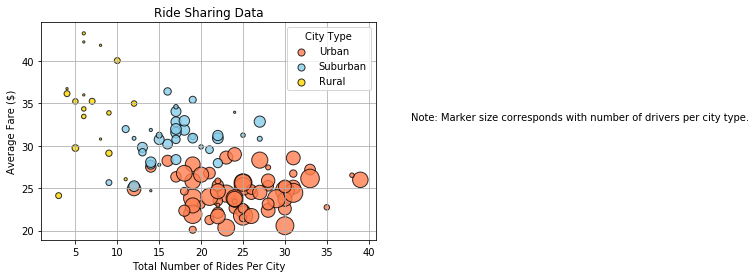

In [38]:
# Plot data by city type
plt.scatter(urban_x, urban_y, s=size, marker="o", facecolors="coral", edgecolors="black", alpha=.8, label='Urban')
plt.scatter(suburban_x, suburban_y,s=s_size, marker="o", facecolors="skyblue", edgecolors="black", alpha=.8, label='Suburban')
plt.scatter(rural_x, rural_y, s=r_size, marker="o", facecolors="gold", edgecolors="black", alpha=.8, label='Rural')

# Set Axis Labels and Title
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")
plt.title("Ride Sharing Data")

# Add legend
legend = plt.legend(title="City Type", loc="upper right", labelspacing=.5, markerscale=.8)
# Had a little SO help for this one. Setting plt.legend(params) equal to a variable turns it into an iterable? 
# So now we can override the weights given to the city type scatter plot and set a fixed legend size.
for handle in legend.legendHandles:
    handle.set_sizes([50.0])
    
# Add grid
plt.grid()
plt.text(45, 33, 'Note: Marker size corresponds with number of drivers per city type.')

# Export scatterplot to image
plt.savefig('exported_images/Rideshares.png')
plt.show()

In [99]:
# Set up percentage lists for pie charts
# Fares
urban_fares = round((df_urban['ttl_fare'].sum()/df_cities['ttl_fare'].sum()) * 100, 1)
suburban_fares = round((df_suburban['ttl_fare'].sum()/df_cities['ttl_fare'].sum()) * 100, 1)
rural_fares = round((df_rural['ttl_fare'].sum()/df_cities['ttl_fare'].sum()) * 100, 1)

# Rides
urban_rides = round((df_urban['rides'].sum()/df_cities['rides'].sum()) * 100, 1)
suburban_rides = round((df_suburban['rides'].sum()/df_cities['rides'].sum()) * 100, 1)
rural_rides = round((df_rural['rides'].sum()/df_cities['rides'].sum()) * 100, 1)

# Drivers
urban_drivers = round((df_urban['driver_count'].sum()/df_cities['driver_count'].sum()) * 100, 1)
suburban_drivers = round((df_suburban['driver_count'].sum()/df_cities['driver_count'].sum()) * 100, 1)
rural_drivers = round((df_rural['driver_count'].sum()/df_cities['driver_count'].sum()) * 100, 1)

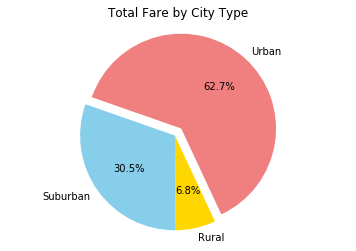

In [100]:
# Build Fares by City Type Pie Chart
labels = ['Urban', 'Suburban', 'Rural']
colors = ['lightcoral', 'skyblue', 'gold']
fare_sizes = [urban_fares, suburban_fares, rural_fares]
explode = (0.1, 0, 0)
plt.pie(fare_sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=295)
plt.axis('equal')
plt.title('Total Fare by City Type')
plt.show()

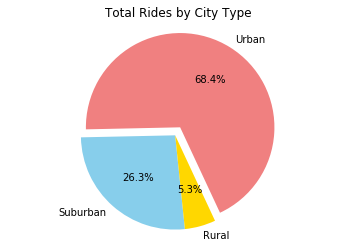

In [101]:
# Build Rides by City Type Pie Chart
rides_sizes = [urban_rides, suburban_rides, rural_rides]
plt.pie(rides_sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=295)
plt.axis('equal')
plt.title('Total Rides by City Type')
plt.show()

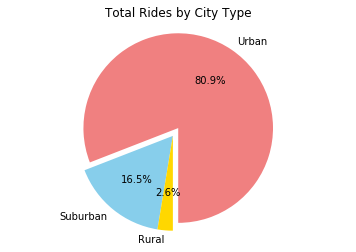

In [102]:
# Build Drivers by City Type Pie Chart
drivers_sizes = [urban_drivers, suburban_drivers, rural_drivers]
plt.pie(drivers_sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=270)
plt.axis('equal')
plt.title('Total Rides by City Type')
plt.show()